# Project
***
### Cian Hogan
### GMIT Data Analytics 2020
### Programming for Data Analysis Module

Data I want to generate

|Year|Property Type|Location|Sqr Footage|Price (€)|
|-----|-----|-----|-----|----|
|    |     |      |     |    |

Use previous property data to predict future house prices and generate sample data

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

In [2]:
data = pd.read_csv("PPR-ALL.csv", usecols=["Date of Sale (dd/mm/yyyy)", "County", "Price (€)"])
print(data.head())

  Date of Sale (dd/mm/yyyy)    County     Price (€)
0                  1/1/2010    Dublin  € 343,000.00
1                  3/1/2010     Laois  € 185,000.00
2                  4/1/2010    Dublin  € 438,500.00
3                  4/1/2010     Meath  € 400,000.00
4                  4/1/2010  Kilkenny  € 160,000.00


In [3]:
data["Price"] = data.loc[:,"Price (€)"].str.slice(1,).str.replace(",", "").astype(float)

In [5]:
print(data.head())
print(data["Price"].min())
print(data["Price"].max())

  Date of Sale (dd/mm/yyyy)    County     Price (€)     Price
0                  1/1/2010    Dublin  € 343,000.00  343000.0
1                  3/1/2010     Laois  € 185,000.00  185000.0
2                  4/1/2010    Dublin  € 438,500.00  438500.0
3                  4/1/2010     Meath  € 400,000.00  400000.0
4                  4/1/2010  Kilkenny  € 160,000.00  160000.0
5030.53
142256576.05


In [7]:
print(round(data["Price"].std()))

804626


In [9]:
print(round(data["Price"].mean(),0))
print(round(data["Price"].median(),0))

255374.0
193000.0


## Price by County
***

### Percentage of houses sold by county

In [11]:
countyCount = round(data["Price"].groupby(data["County"]).count()/len(data),4)

print(countyCount)

County
Carlow       0.0109
Cavan        0.0155
Clare        0.0229
Cork         0.1095
Donegal      0.0274
Dublin       0.3223
Galway       0.0505
Kerry        0.0290
Kildare      0.0500
Kilkenny     0.0157
Laois        0.0151
Leitrim      0.0090
Limerick     0.0374
Longford     0.0085
Louth        0.0266
Mayo         0.0237
Meath        0.0396
Monaghan     0.0078
Offaly       0.0119
Roscommon    0.0143
Sligo        0.0148
Tipperary    0.0268
Waterford    0.0264
Westmeath    0.0193
Wexford      0.0340
Wicklow      0.0311
Name: Price, dtype: float64


In [14]:
countyMedian = data["Price"].groupby(data["County"]).median()
countyMean = data["Price"].groupby(data["County"]).mean()

print(countyMean- countyMedian)

County
Carlow        13730.626067
Cavan         19556.671794
Clare         24558.081770
Cork          35893.147524
Donegal       15884.223387
Dublin       105902.307969
Galway        32380.838069
Kerry         21401.165784
Kildare       19988.582167
Kilkenny      25341.174784
Laois         18905.684030
Leitrim       17242.324651
Limerick      21324.160336
Longford      17511.939497
Louth         19534.348069
Mayo          20587.399136
Meath         12097.215738
Monaghan      14590.446891
Offaly        15282.871282
Roscommon     19724.981167
Sligo         28082.468263
Tipperary     16961.246999
Waterford     20909.584380
Westmeath     19755.518099
Wexford       14681.782528
Wicklow       47832.769499
Name: Price, dtype: float64


In [15]:
medianRatio = (countyMedian/data["Price"].median())

print(medianRatio)

County
Carlow       0.699482
Cavan        0.505181
Clare        0.686528
Cork         0.984456
Donegal      0.518135
Dublin       1.552124
Galway       0.880829
Kerry        0.707585
Kildare      1.253005
Kilkenny     0.803109
Laois        0.661934
Leitrim      0.424870
Limerick     0.751295
Longford     0.401554
Louth        0.841969
Mayo         0.544041
Meath        1.165803
Monaghan     0.595855
Offaly       0.627720
Roscommon    0.430052
Sligo        0.544041
Tipperary    0.621762
Waterford    0.699482
Westmeath    0.673575
Wexford      0.738342
Wicklow      1.347150
Name: Price, dtype: float64


## Price by year
***


In [16]:
data["Year"] = pd.DatetimeIndex(data.loc[:,"Date of Sale (dd/mm/yyyy)"]).year

print(data.head())

  Date of Sale (dd/mm/yyyy)    County     Price (€)     Price  Year
0                  1/1/2010    Dublin  € 343,000.00  343000.0  2010
1                  3/1/2010     Laois  € 185,000.00  185000.0  2010
2                  4/1/2010    Dublin  € 438,500.00  438500.0  2010
3                  4/1/2010     Meath  € 400,000.00  400000.0  2010
4                  4/1/2010  Kilkenny  € 160,000.00  160000.0  2010


In [19]:
yearMedian = data.groupby("Year").median()
yearMedian["Pct Change"] = yearMedian.pct_change()

In [21]:
print(yearMedian.mean())

Price         188034.726364
Pct Change         0.022546
dtype: float64


In [22]:
print(yearMedian.std())

Price         36857.728771
Pct Change        0.105846
dtype: float64


# Generate Data

#### Generate county

In [23]:
sample = pd.DataFrame(columns=["Date", "County", "m_Squared", "Price"])

rng = np.random.default_rng(12345)

sample["County"]= rng.choice(countyCount.index, p=countyCount.values, size=10000)

print(sample)

     Date   County m_Squared Price
0     NaN   Dublin       NaN   NaN
1     NaN   Dublin       NaN   NaN
2     NaN    Meath       NaN   NaN
3     NaN  Leitrim       NaN   NaN
4     NaN   Dublin       NaN   NaN
...   ...      ...       ...   ...
9995  NaN   Galway       NaN   NaN
9996  NaN  Wexford       NaN   NaN
9997  NaN    Cavan       NaN   NaN
9998  NaN    Kerry       NaN   NaN
9999  NaN   Galway       NaN   NaN

[10000 rows x 4 columns]


#### Generate Date

In [24]:
dates = pd.date_range(start='1/1/2021', end='31/12/2025')
sample["Date"] = rng.choice(dates, size=len(sample))
sample["Year"] = pd.DatetimeIndex(sample.loc[:,"Date"]).year
print(sample.head())

        Date   County m_Squared Price  Year
0 2021-10-04   Dublin       NaN   NaN  2021
1 2025-08-14   Dublin       NaN   NaN  2025
2 2022-02-06    Meath       NaN   NaN  2022
3 2025-06-28  Leitrim       NaN   NaN  2025
4 2023-01-01   Dublin       NaN   NaN  2023


#### Generate Sqr Footage

In [25]:
# avg square footage ireland = 81m2

print(data["Price"].mean()/81)
print(data["Price"].median()/81)

avgPerM = data["Price"].mean()/81

areaStd = (149-59)/4

print(areaStd)


3152.76818600237
2382.716049382716
22.5


In [26]:
sample["m_Squared"] = rng.normal(loc=81, scale=areaStd, size=len(sample))
sample["m_Squared"] = round(sample["m_Squared"])

print(sample.head())

        Date   County  m_Squared Price  Year
0 2021-10-04   Dublin       60.0   NaN  2021
1 2025-08-14   Dublin       72.0   NaN  2025
2 2022-02-06    Meath       61.0   NaN  2022
3 2025-06-28  Leitrim      114.0   NaN  2025
4 2023-01-01   Dublin       79.0   NaN  2023


#### Generate Sale Price

In [27]:
medRatio = []

for i in sample["County"]:
    ratio = medianRatio[i]
    
    medRatio.append(ratio)



In [28]:
# Create random change in year avg
yearPct = {}
pct = 1
for year in range(2021, 2026):
    
    yearPct[year] = round(pct + rng.normal(loc=0.022546, scale=0.105846),4)


In [ ]:
growth = []

for i in sample["Year"]:
    growpct = yearPct[i]
    
    growth.append(growpct)

In [29]:
msquarePrice = []

for i in sample["m_Squared"]:
        
    price = i * avgPerM
        
    msquarePrice.append(price)
        

In [44]:
noise = rng.normal(1, .05, size=len(sample))

In [45]:
print(noise.max())
print(noise.min())
print(noise.mean())

1.1727104551508731
0.8205521251668653
0.9992842621293959


In [46]:
medRatio = np.asarray(medRatio)
growth = np.asarray(growth)
msquarePrice = np.asarray(msquarePrice)

price = medRatio*growth*msquarePrice*noise

In [51]:
sample["Price"] = price
sample["Price"] = sample["Price"].round().astype(int)

In [52]:
print(sample.head())

        Date   County  m_Squared   Price  Year
0 2021-10-04   Dublin       60.0  291779  2021
1 2025-08-14   Dublin       72.0  403281  2025
2 2022-02-06    Meath       61.0  214298  2022
3 2025-06-28  Leitrim      114.0  164584  2025
4 2023-01-01   Dublin       79.0  486586  2023


# Analyse Generated Data

Analyse the relationship between price and county|m2|Date

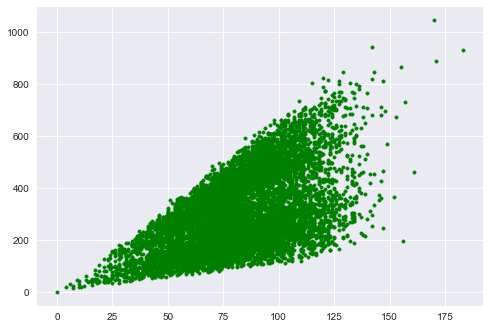

In [133]:
plt.scatter(sample["m_Squared"], sample["Price"]/1000, marker=".", color="g")

        Date  County  m_Squared   Price  Year
0 2021-10-04  Dublin       60.0  291779  2021
1 2025-08-14  Dublin       72.0  403281  2025
4 2023-01-01  Dublin       79.0  486586  2023
5 2024-05-14  Dublin      117.0  570673  2024
7 2022-11-30  Dublin       45.0  219082  2022


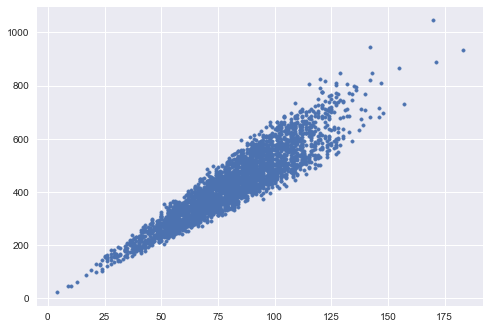

In [134]:
dublin = sample[sample["County"] == "Dublin"]
print(dublin.head())
plt.scatter(dublin["m_Squared"], dublin["Price"]/1000, marker=".")

## Data by province

In [108]:
munster = ["Cork", "Clare", "Kerry", "Limerick", "Tipperary", "Waterford"]
leinster_exdub = ["Carlow", "Kildare", "Kilkenny", "Laois", "Longford", "Louth", 
                  "Meath", "Offaly", "Wicklow", "Westmeath", "Wexford" ]
connaught = ["Galway", "Leitrim", "Mayo", "Roscommon", "Sligo"]
ulster = ["Cavan", "Monaghan", "Donegal"]

In [109]:
munsterSample = sample[sample["County"].isin(munster)]
leinsterSample = sample[sample["County"].isin(leinster_exdub)]
connaughtSample = sample[sample["County"].isin(connaught)]
ulsterSample = sample[sample["County"].isin(ulster)]

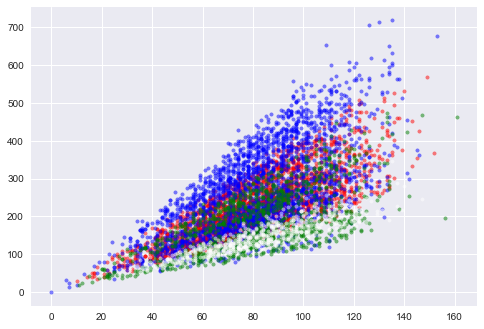

In [135]:
plt.scatter(munsterSample["m_Squared"], munsterSample["Price"]/1000, marker=".", color="r", alpha=.5)
plt.scatter(leinsterSample["m_Squared"], leinsterSample["Price"]/1000, marker=".", color="b", alpha=.5)
plt.scatter(connaughtSample["m_Squared"], connaughtSample["Price"]/1000, marker=".", color="g", alpha=.5)
plt.scatter(ulsterSample["m_Squared"], ulsterSample["Price"]/1000, marker=".", color="w", alpha=.5)

### Regression

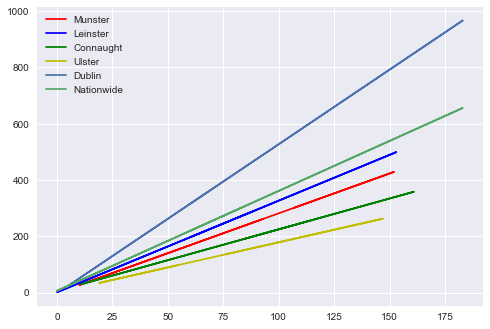

In [136]:
func1 = np.poly1d(np.polyfit(munsterSample["m_Squared"], munsterSample["Price"], 1))

func2 = np.poly1d(np.polyfit(leinsterSample["m_Squared"], leinsterSample["Price"], 1))

func3 = np.poly1d(np.polyfit(connaughtSample["m_Squared"], connaughtSample["Price"], 1))

func4 = np.poly1d(np.polyfit(ulsterSample["m_Squared"], ulsterSample["Price"], 1))

func5 = np.poly1d(np.polyfit(dublin["m_Squared"], dublin["Price"], 1))

func6 = np.poly1d(np.polyfit(sample["m_Squared"], sample["Price"], 1))

plt.plot(munsterSample["m_Squared"], func1(munsterSample["m_Squared"])/1000, label="Munster", color="r")
plt.plot(leinsterSample["m_Squared"], func2(leinsterSample["m_Squared"])/1000, label="Leinster", color="b")
plt.plot(connaughtSample["m_Squared"], func3(connaughtSample["m_Squared"])/1000, label="Connaught", color="g")
plt.plot(ulsterSample["m_Squared"], func4(ulsterSample["m_Squared"])/1000, label="Ulster", color="y")
plt.plot(dublin["m_Squared"], func5(dublin["m_Squared"])/1000, label="Dublin")
plt.plot(sample["m_Squared"], func6(sample["m_Squared"])/1000, label="Nationwide")
plt.legend()

## Group by Date

In [140]:
months = pd.date_range(start='1/1/2021', end='31/12/2025', freq="M")
print(months)

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
      

In [74]:
monthAvg = sample.groupby(pd.Grouper(key="Date", freq="M")).median()
monthCount= sample.groupby(pd.Grouper(key="Date", freq="M")).count()

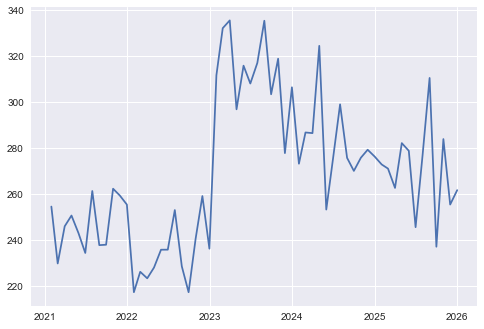

In [150]:
plt.plot(monthAvg.index, monthAvg["Price"]/1000)

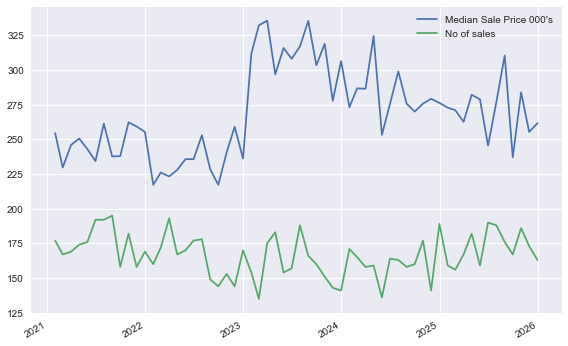

In [138]:
plt.plot(monthAvg.index, monthAvg["Price"]/1000, label="Median Sale Price 000's")
plt.plot(monthCount.index, monthCount["Price"], label="No of sales")
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.legend()

### Region by date

In [126]:
munsterMonth = munsterSample.groupby(pd.Grouper(key="Date", freq="M")).median()
leinsterMonth = leinsterSample.groupby(pd.Grouper(key="Date", freq="M")).median()
connaughtMonth = connaughtSample.groupby(pd.Grouper(key="Date", freq="M")).median()
ulsterMonth = ulsterSample.groupby(pd.Grouper(key="Date", freq="M")).median()
dublinMonth = dublin.groupby(pd.Grouper(key="Date", freq="M")).median()


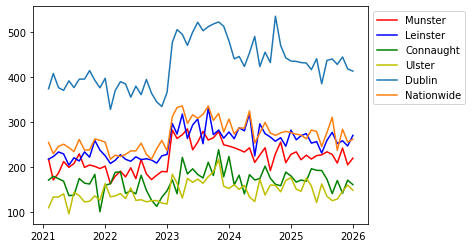

In [130]:
plt.plot(munsterMonth.index, munsterMonth["Price"]/1000, label="Munster", color="r")
plt.plot(leinsterMonth.index, leinsterMonth["Price"]/1000, label="Leinster", color="b")
plt.plot(connaughtMonth.index, connaughtMonth["Price"]/1000, label="Connaught", color="g")
plt.plot(ulsterMonth.index, ulsterMonth["Price"]/1000, label="Ulster", color="y")
plt.plot(dublinMonth.index, dublinMonth["Price"]/1000, label="Dublin")
plt.plot(monthAvg.index, monthAvg["Price"]/1000, label="Nationwide")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# References

https://propertypriceregister.ie/Website/NPSRA/pprweb.nsf/page/ppr-home-en

https://www.macrotrends.net/countries/IRL/ireland/gdp-growth-rate

https://static.rasset.ie/documents/news/2020/07/daft.pdf

https://www.finfacts-blog.com/2018/08/average-irish-housing-size-lowest-of.html#:~:text=What%20is%20striking%20about%20average,and%20107%20in%20the%20Netherlands

https://www.rightmove.co.uk/news/articles/property-news/values-per-square-metre-of-houses-in-england-and-wales-revealed/#:~:text=The%20average%20asking%20price%20per%20square%20metre%20of%20houses%20across,%C2%A310%2C427%20per%20square%20metre

https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/725085/Floor_Space_in_English_Homes_main_report.pdf

mean price vs median https://understanding.herefordshire.gov.uk/media/1389/why_do_we_use_the_median_figure_for_house_prices_and_earnings.pdf

